In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Leitura dataset
dataset = pd.read_csv('zoo.csv')

In [4]:
dataset.shape

(101, 18)

In [5]:
# Não considerar a classe do conjunto de dados 
df = dataset[dataset.columns[:-1]]
df.head(100)

,animal_name,pelos,penas,ovos,leite,voa,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,barbatanas,patas,rabo,domestico,tamanho
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0


In [6]:
df.groupby('animal_name').size()

animal_name
aardvark    1
antelope    1
bass        1
bear        1
boar        1
buffalo     1
calf        1
carp        1
catfish     1
cavy        1
cheetah     1
chicken     1
chub        1
clam        1
crab        1
crayfish    1
crow        1
deer        1
dogfish     1
dolphin     1
dove        1
duck        1
elephant    1
flamingo    1
flea        1
frog        2
fruitbat    1
giraffe     1
girl        1
gnat        1
           ..
rhea        1
scorpion    1
seahorse    1
seal        1
sealion     1
seasnake    1
seawasp     1
skimmer     1
skua        1
slowworm    1
slug        1
sole        1
sparrow     1
squirrel    1
starfish    1
stingray    1
swan        1
termite     1
toad        1
tortoise    1
tuatara     1
tuna        1
vampire     1
vole        1
vulture     1
wallaby     1
wasp        1
wolf        1
worm        1
wren        1
Length: 100, dtype: int64

In [7]:
#Dividindo dados
feature_columns = ['pelos', 'penas', 'ovos','leite','voa','aquatico','predador','dentes','espinha_dorsal','respira','venenoso','barbatanas','patas','rabo','domestico','tamanho']
x = df[feature_columns].values
y = df['animal_name'].values

In [8]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

C:\Users\Duda\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#setar para 
neighbors = np.arange(1,6)
#print neighbors
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    #accuracy treinamento
    train_accuracy[i] = knn.score(x_train, y_train)
    #accuracy teste
    test_accuracy[i] = knn.score(x_test, y_test) 
    
    # Predicao de teste para resultados
    X_predTe = knn.predict(x_test)
    # Predicao de treinamento para resultados
    X_predTr = knn.predict(x_train)
    
    
    print('Train - Quando o K '+ str(k) +' a Accuracy do modelo é igual a ' + str(round(train_accuracy[i], 2)) + ' %.')
    print('Predicao Train - Quando o K '+ str(k) +' e ' + X_predTr[i])
    print('Test - Quando o K '+ str(k) +' a Accuracy do modelo é igual a ' + str(round(test_accuracy[i], 2)) + ' %.')
    print('Predicao Test - Quando o K '+ str(k) +' e' + X_predTe[i])
    print   


Train - Quando o K 1 a Accuracy do modelo é igual a 0.64 %.
Predicao Train - Quando o K 1 e pitviper
Test - Quando o K 1 a Accuracy do modelo é igual a 0.05 %.
Predicao Test - Quando o K 1 efrog

Train - Quando o K 2 a Accuracy do modelo é igual a 0.38 %.
Predicao Train - Quando o K 2 e aardvark
Test - Quando o K 2 a Accuracy do modelo é igual a 0.05 %.
Predicao Test - Quando o K 2 edogfish

Train - Quando o K 3 a Accuracy do modelo é igual a 0.26 %.
Predicao Train - Quando o K 3 e kiwi
Test - Quando o K 3 a Accuracy do modelo é igual a 0.05 %.
Predicao Test - Quando o K 3 echub

Train - Quando o K 4 a Accuracy do modelo é igual a 0.24 %.
Predicao Train - Quando o K 4 e boar
Test - Quando o K 4 a Accuracy do modelo é igual a 0.05 %.
Predicao Test - Quando o K 4 eantelope

Train - Quando o K 5 a Accuracy do modelo é igual a 0.16 %.
Predicao Train - Quando o K 5 e boar
Test - Quando o K 5 a Accuracy do modelo é igual a 0.0 %.
Predicao Test - Quando o K 5 egirl



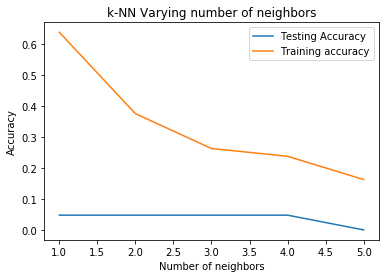

In [57]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()